<a href="https://colab.research.google.com/github/Alistair212/Alistair212/blob/main/Copy_of_COMP2712_8715_2021_Assignment01_AlistairHorwood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP2712_8715 Assignment01: Classifying Images Using MLP and SVM Algorithms 
This assignment is to explore the concepts covered in the topic so far with respect to training and evaluating classifiers such as the Multi-layer Perceptron (MLP) and Support Vector Machines (SVM).  

This starter Notebook can be used as a starter for this assignment.  It contains examples for reading and manipulating the dataset and training a standard MLP.  You should use this notebook in conjunction with the Assignment Specification that can be found on the topic FLO page: [COMP2712_8715](https://flo.flinders.edu.au/course/view.php?id=71089#section-17)



## Accessing Data from Google Drive
The dataset for this assignment is the CIFAR-10 dataset that can be found here:
https://www.cs.toronto.edu/~kriz/cifar.html 

The CIFAR-10 and CIFAR-100 are well studied, yet challenging image recognition dataset. The CIFAR-10 has up to 10 classes to classify and contains 60,000 32x32 images. You should read the description of the dataset and download the dataset for Python, that is

CIFAR-10 python version: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

Once downloaded you need to then extract and upload the `cifar-10-batches-py` directory your Google Drive so that you can access it from within your Google Colab.

You can mount the Google Drive from the menu on the left or uncomment use the code below mount the drive.  See here for documentation on file access in Colab:

[External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# uncomment the below to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions to work with CIFAR

The functions below help with access to the CIFAR-10 data the you have downloaded.

In [3]:
import pickle
import numpy as np
import pandas as pd

def load_CIFAR_batch(filename, flatten=True, categorical=True):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']        
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        if (flatten):
          X = X.reshape(10000, 3072)
        X = X.astype('float32')
        X /= 255

        y = datadict[b'labels']
        y = np.array(y)
        if (categorical):
          y = pd.get_dummies(y).values

        return X, y

def load_CIFAR_meta(filename):
  with open(filename,'rb') as f:
    metadict = pickle.load(f, encoding='bytes')

    class_labels = [ val.decode() for val in metadict.get(b'label_names') ]
    return class_labels

def get_image(X, index, nchans=3, size=32):
  xi = X[index,:]
  img = xi.reshape(32, 32, 3)
  return img

## Load the CIFAR data

The CIFAR data has 5 batches of data and 1 test data set. Each batch is labelled
- `data_batch_1`
- `data_batch_2`
- `data_batch_3`
- `data_batch_4`
- `data_batch_5`

and a test set labelled
- `test_batch`

each batch has 10,000 images, so 50,000 training and 10,000 test images.

Below is example of loading the first batch of training data labelled as `data_batch_1`.  You will need to update the path to match where you have stored your cifar-10 data.

In [4]:
X, y = load_CIFAR_batch('/content/drive/My Drive/cifar-10-batches-py/data_batch_1')

The number of instances/examples for all the different classes.  There are 10 different classes.

In [5]:
[np.sum(np.argmax(y, axis=1) == i) for i in range(0,10)]

[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]

The labels for the classes are stored in the `batches.meta` file

In [6]:
class_labels = load_CIFAR_meta('/content/drive/MyDrive/cifar-10-batches-py/batches.meta')
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Let's look at some random cat images, because cats.

In [7]:
import random
import matplotlib.pyplot as plt

def plot_random(X, y, class_labels, what_target='cat'):

  what_label = class_labels.index(what_target)
  what_labeli = np.where(np.argmax(y,axis=1) == what_label)[0]
  random_what_index = what_labeli[random.choice(range(len(what_labeli)))]

  plt.imshow(get_image(X,random_what_index))
  plt.title('{}, index: {}'.format(what_target,random_what_index))
  plt.axis('off')

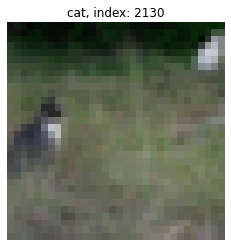

In [8]:
plot_random(X, y, class_labels, what_target='cat')


## Set up and train MLP

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,stratify=y)


hidden_layer_sizes = 100
activation_fcn = 'relu' # {identity, logistic, tanh, relu}, default='relu'
max_iter=200

# model initialization
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes), activation=activation_fcn, 
                    max_iter=max_iter, #try change hidden layer, or max_iter
                    solver='adam', verbose=1,   #try verbose=0 to train with out logging
                    random_state=None,
                    tol=0.00001,n_iter_no_change=20) # decreasing tol and increasing no_change will train the network 'harder' and usually longer

mlp.fit(Xtrain, ytrain) 


Iteration 1, loss = 3.40028810
Iteration 2, loss = 3.02815017
Iteration 3, loss = 2.91589164
Iteration 4, loss = 2.84009878
Iteration 5, loss = 2.80101889
Iteration 6, loss = 2.77659016
Iteration 7, loss = 2.73566213
Iteration 8, loss = 2.71443283
Iteration 9, loss = 2.67922882
Iteration 10, loss = 2.66443355
Iteration 11, loss = 2.63113237
Iteration 12, loss = 2.60313864
Iteration 13, loss = 2.58895066
Iteration 14, loss = 2.56499366
Iteration 15, loss = 2.54395485
Iteration 16, loss = 2.51265098
Iteration 17, loss = 2.48736561
Iteration 18, loss = 2.48410163
Iteration 19, loss = 2.46527656
Iteration 20, loss = 2.45080042
Iteration 21, loss = 2.44282864
Iteration 22, loss = 2.43325993
Iteration 23, loss = 2.42099894
Iteration 24, loss = 2.42500132
Iteration 25, loss = 2.41859969
Iteration 26, loss = 2.37378923
Iteration 27, loss = 2.35644677
Iteration 28, loss = 2.33417778
Iteration 29, loss = 2.34527479
Iteration 30, loss = 2.32135994
Iteration 31, loss = 2.30930993
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=100, n_iter_no_change=20, tol=1e-05, verbose=1)

## Evaluate the performance of the classfier



Need to remember to use `predict_proba` for the multiclass classification and apply a softmax/argmax to the output (i.e. choose the largest probability)

### Test it out on a random image from the training data.  

Image Index:  2
Probability of class: [ 0  0  3 29 12  4 29  0  0  0]
real class     :  6 => frog
predicted class:  3 => cat
Image Index:  3
Probability of class: [ 0  0  2  4  0  0  0  0 10 78]
real class     :  9 => truck
predicted class:  9 => truck
range(0, 7500)


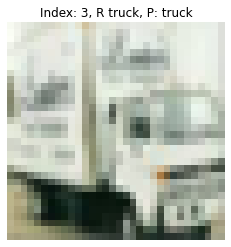

In [31]:
# idx = random.choice(range(Xtrain.shape[0]))


def visual_result(idx):
  print('Image Index: ',idx)
  # make sure you use predict_proba for the multi-class classification
  ypreda = mlp.predict_proba(Xtrain)
  print('Probability of class: {}'.format((ypreda[idx,:]*100).astype(int)))
  ypred = np.argmax(ypreda[idx,:], axis=0)
  ytrue = np.argmax(ytrain[idx,:], axis=0)
  print('real class     : ',ytrue,'=>',class_labels[ytrue])
  print('predicted class: ',ypred,'=>',class_labels[ypred])
  plt.imshow(get_image(Xtrain,idx))
  plt.title('Index: {}, R {}, P: {}'.format(idx,class_labels[ytrue],class_labels[ypred]))
  plt.axis('off');

visual_result(2)
visual_result(3)
print(range(Xtrain.shape[0]))

### Evaluate the performance on the whole training set

In [ ]:
ytrue = np.argmax(ytrain, axis=1)
ypreda = mlp.predict_proba(Xtrain)
ypred = np.argmax(ypreda, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)


### Evaluate on the performance on testing set

In [ ]:
ytrue = np.argmax(ytest, axis=1)
ypreda = mlp.predict_proba(Xtest)
ypred = np.argmax(ypreda, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)

## Try just classifying two classes

Classfiying all 10 classes can be challenging.  Let's try a simplier task of classfiy just two distinct classes.

In [ ]:
print(class_labels)

In [ ]:
one_target = 'frog'
one_label = class_labels.index(one_target)
print('Choose ', class_labels[one_label],'as the first class')
one_labeli = np.where(np.argmax(y,axis=1) == one_label)[0]
print('There are {} instances for the label {}'.format(len(one_labeli),one_target))

In [ ]:
two_target = 'horse'
two_label = class_labels.index(two_target)
print('Choose ', class_labels[two_label],'as the first class')
two_labeli = np.where(np.argmax(y,axis=1) == two_label)[0]
print('There are {} instances for the label {}'.format(len(two_labeli),two_target))

In [ ]:
alli = np.hstack((one_labeli,two_labeli))
Xsubset = X[alli,:]

# construct a new y with just the one and two label
ysubset = y[alli,:]
yclass = np.argmax(ysubset,axis=1)
yclass[yclass == one_label] = 1
yclass[yclass == two_label] = 2
print(yclass)
ysubset = pd.get_dummies(yclass).values
print(ysubset)


### Train

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# split into train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(Xsubset, ysubset,stratify=ysubset)


hidden_layer_sizes = 100
activation_fcn = 'relu' # {identity, logistic, tanh, relu}, default='relu'
max_iter=200

# model initialization
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes), activation=activation_fcn, 
                    max_iter=max_iter, #try change hidden layer, or max_iter
                    solver='adam', verbose=1,   #try verbose=0 to train with out logging
                    random_state=None,
                    tol=0.00001,n_iter_no_change=20) # decreasing tol and increasing no_change will train the network 'harder' and usually longer

mlp.fit(Xtrain, ytrain) 



### Evaluate

In [ ]:
print('### Training ###')
ytrue = np.argmax(ytrain, axis=1)
ypred = mlp.predict(Xtrain)
ypred = np.argmax(ypred, axis=1)
report = classification_report(ytrue, ypred)
print(report)

mat = confusion_matrix(ytrue,ypred)
print(mat)
print()
print('### Testing ###')
ytrue = np.argmax(ytest, axis=1)
ypred = mlp.predict(Xtest)
ypred = np.argmax(ypred, axis=1)
report = classification_report(ytrue, ypred)
print(report)
mat = confusion_matrix(ytrue,ypred)
print(mat)